In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Multiclass Classification Problem


# Handwritten Digit Classification using ANN with MNIST Dataset


In [63]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [64]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data();

In [65]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [66]:
X_train.shape

(60000, 28, 28)

In [67]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [68]:
X_train[0].shape

(28, 28)

In [69]:
X_test.shape

(10000, 28, 28)

In [70]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [71]:
Y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

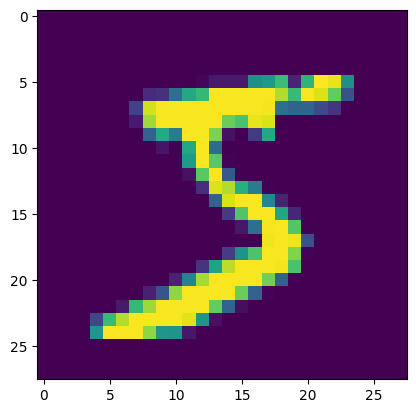

In [72]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

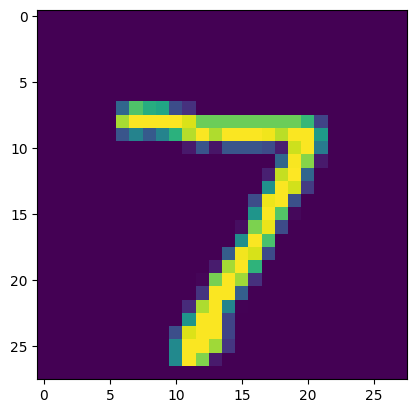

In [73]:
plt.imshow(X_test[0])

# image contain pixel value 0 and 255 so we have to normalize it in range 0 and 1 so that during training of neural network, the more the value is in between similar range the more quickly we will be able to get correct weight and convergence will be fast. so here we will divide every pixel value with 255.

In [74]:
X_train=X_train/255
X_test=X_test/255

In [75]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [76]:
#build model
model=Sequential()

#our image is in format 28*28 so we need to flatten the input layer 
#from 2D to 1D or any higher dimension to 1 dimension we use flatten layer
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu')) #no need to specify input because flatten output will be input here
model.add(Dense(10,activation='softmax')) #for multiclass we have to use softmax


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [77]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
#now we need to compile our model
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy']) #used sparse instead of simple categorical crossentropy because in sparse we dont need to do one hot encoding for our labels


In [79]:
#now we will train our model
history=model.fit(X_train,Y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8674 - loss: 0.4736 - val_accuracy: 0.9559 - val_loss: 0.1564
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9615 - loss: 0.1311 - val_accuracy: 0.9647 - val_loss: 0.1150
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9750 - loss: 0.0874 - val_accuracy: 0.9693 - val_loss: 0.0973
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9799 - loss: 0.0644 - val_accuracy: 0.9736 - val_loss: 0.0922
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9858 - loss: 0.0476 - val_accuracy: 0.9722 - val_loss: 0.0878
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9900 - loss: 0.0334 - val_accuracy: 0.9741 - val_loss: 0.0874
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9916 - loss: 0.0289 - val_accuracy: 0.9747 - val_loss: 0.0848
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9943 - loss: 0.0202 - 

In [80]:
y_probability=model.predict(X_test)   #tell us about probability of all 10000 digit like 1 2 3 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [81]:
y_probability

array([[6.78160816e-08, 1.05361964e-09, 8.16166246e-09, ...,
        9.99993742e-01, 2.81975741e-08, 1.06989387e-06],
       [2.49649013e-08, 2.78330106e-07, 9.99999583e-01, ...,
        3.06635668e-16, 5.02318649e-08, 3.52029196e-16],
       [5.22985545e-07, 9.97326314e-01, 2.28840745e-05, ...,
        4.25947481e-04, 1.86829513e-03, 2.57061629e-06],
       ...,
       [8.72879033e-19, 8.39731424e-18, 5.75665826e-16, ...,
        1.90107619e-09, 1.90466931e-09, 8.47490719e-06],
       [3.73643309e-13, 2.11287812e-14, 7.54663898e-16, ...,
        1.75425538e-14, 4.46994903e-08, 6.21976420e-15],
       [1.17624063e-06, 1.27362807e-15, 1.08177192e-08, ...,
        3.06767593e-16, 1.14894795e-10, 6.58477786e-11]], dtype=float32)

for every array we need to find out that which index value is maximum to get which digit the image represent

In [82]:
y_prediction=y_probability.argmax(axis=1)

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9242

if we will use another neural network like CNN which is best for image accuracy will be more compare to this.
still we can increase our accuracy here by increasing number of hidden layers or by increasing number of node in layers or by increasing number of epoch or by changing activation function

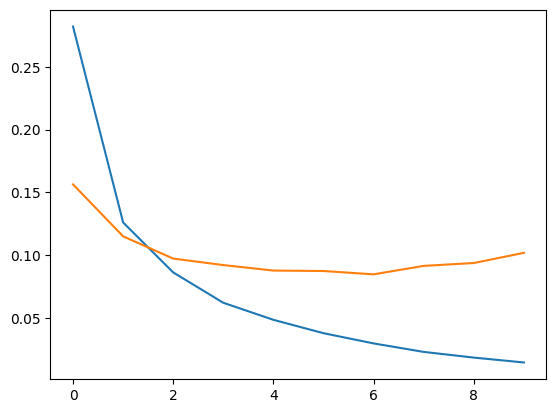

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

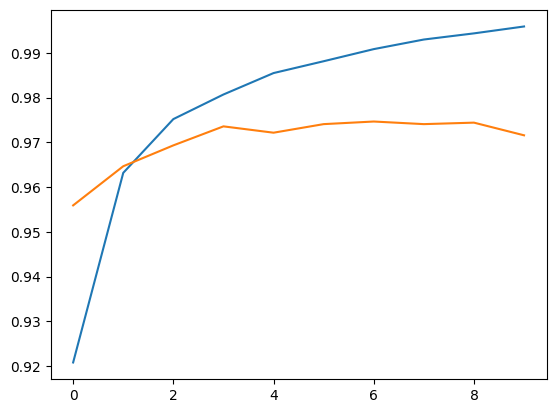

In [86]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [88]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

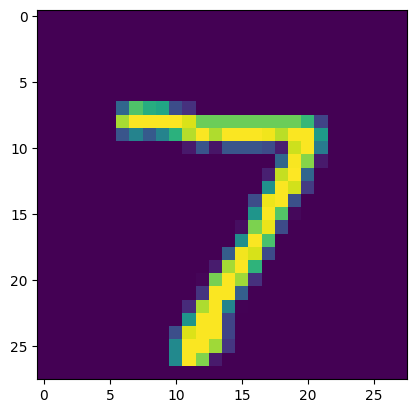

In [89]:
plt.imshow(X_test[0])

In [90]:
model.predict(X_test[0].reshape(1,28,28)) # we will get probability of each number

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[6.7815833e-08, 1.0536196e-09, 8.1616633e-09, 4.9557148e-06,
        3.1826670e-16, 8.6696456e-11, 2.7937156e-14, 9.9999380e-01,
        2.8197576e-08, 1.0698909e-06]], dtype=float32)

In [91]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([7])

so now we are able to see that out model is predicting the corrrect output for index 0 which is 7 so similarly we can check it for any index and compare the actual and predicted output.